### Based on Zaccone: Python Parallel Programming Cookbook

In [1]:
#asyncio doesn't work with tornado > 5.0 yet... See, e.g. https://github.com/jupyter/notebook/issues/3397

#!pip install tornado==4.5.3
#After pip install, restart the kernel

In [2]:
#!pip install nest-asyncio

In [3]:
import nest_asyncio
nest_asyncio.apply()

* Coroutines are a **generalization of the subroutine**. 

* Like a subroutine, the coroutine computes a single computational step, but unlike subroutines, there is **no main program** that can be used to coordinate the results. 

* This is because the **coroutines link themselves together to form a pipeline**

* In a coroutine, the **execution point can be suspended and resumed later** 

* Having a pool of coroutines, it is possible to interleave their computations: run the first one until it yields the control back, then run the second, and so on down the line.

To define a  coroutine with the Asyncio module, we simply use an annotation:

```python
import asyncio
@asyncio.coroutine
def coroutine_function( function_arguments ) :
     # DO_SOMETHING```

In this example, we will see how to use the coroutine mechanism of Asyncio to simulate 
a finite state machine of five states.

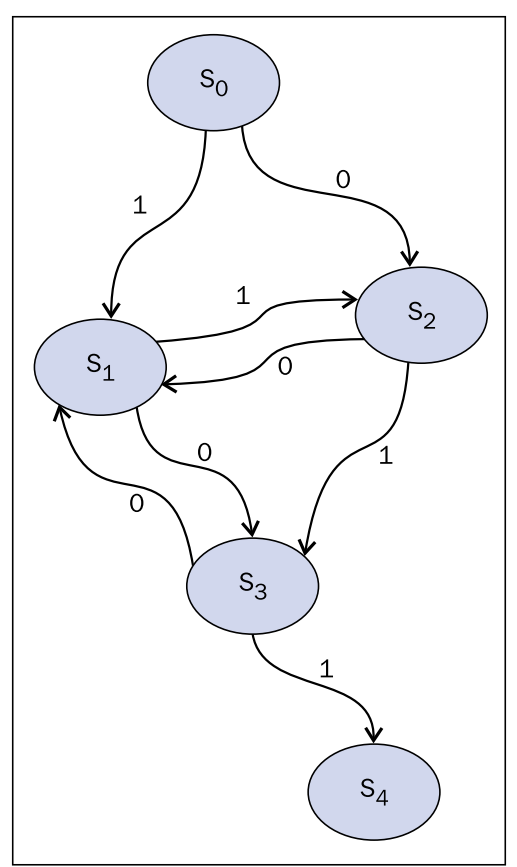

In [4]:
#Asyncio Finite State Machine

import asyncio

import time
from random import randint

In [5]:
@asyncio.coroutine
def StartState():
    print ("Start State")
    input_value = randint(0,1) #random input to this function
    
    time.sleep(1) #wait to simulate slow processing time
    
    #depending on the input_value, we either go to State2 or State 1 to get the result
    if (input_value == 0):
        result = yield from State2(input_value)
    else :
        result = yield from State1(input_value)
    
    # If computation is done and we have received the results, then print them:
    print("List of transitions:\n Start State calling "+ result) #Print out the result from State2 or State1

In [6]:
@asyncio.coroutine
def State1(transition_value):
    print("...State1...")
    
    outputValue =  outputValue =  str(f"State 1 with transition value = {transition_value} \n")
    input_value = randint(0,1)
    
    time.sleep(1)
    
    if (input_value == 0):
        result =  yield from State3(input_value)
    else :
        result = yield from State2(input_value)
    
    result = "State 1 calling " + result
    return (outputValue + str(result))


In [7]:
@asyncio.coroutine
def State2(transition_value):
    print("...State2...")
    
    outputValue =  str(f"State 2 with transition value = {transition_value} \n")
    input_value = randint(0,1)
    
    time.sleep(1)
    
    if (input_value == 0):
        result = yield from State1(input_value)
    else :
        result = yield from State3(input_value)
    
    result = "State 2 calling " + result
    return (outputValue + str(result))


In [8]:
@asyncio.coroutine
def State3(transition_value):
    print("...State3...")
    
    outputValue =  str(f"State 3 with transition value = {transition_value} \n")
    input_value = randint(0,1)
    
    time.sleep(1)
    
    if (input_value == 0):
        result = yield from State1(input_value)
    else :
        result = yield from EndState(input_value)
    
    result = "State 3 calling " + result
    return (outputValue + str(result))


In [9]:
@asyncio.coroutine
def EndState(transition_value):
    print("...End State...")
    
    outputValue =  str(f"End State with transition value = {transition_value} \n")
    
    print("...Stop Computation...")
    print(f'Final result is: {transition_value}')
    return (outputValue )

In [10]:
print("Finite State Machine simulation with Asyncio Coroutine")
loop = asyncio.get_event_loop()

Finite State Machine simulation with Asyncio Coroutine


In [11]:
#run the event loop till all computation is done
loop.run_until_complete(StartState())

Start State
...State1...
...State3...
...State1...
...State2...
...State1...
...State3...
...State1...
...State2...
...State1...
...State2...
...State3...
...State1...
...State3...
...End State...
...Stop Computation...
Final result is: 1
List of transitions:
 Start State calling State 1 with transition value = 1 
State 1 calling State 3 with transition value = 0 
State 3 calling State 1 with transition value = 0 
State 1 calling State 2 with transition value = 1 
State 2 calling State 1 with transition value = 0 
State 1 calling State 3 with transition value = 0 
State 3 calling State 1 with transition value = 0 
State 1 calling State 2 with transition value = 1 
State 2 calling State 1 with transition value = 0 
State 1 calling State 2 with transition value = 1 
State 2 calling State 3 with transition value = 1 
State 3 calling State 1 with transition value = 0 
State 1 calling State 3 with transition value = 0 
State 3 calling End State with transition value = 1 

